In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# ─── Load Data ─────────────────────────────────────────────
file_path = r"Z:\UriMons\Fiber Photometry\adBNST_eEPA_GCaMP8s\Mixed_effect_model.xlsx"  # ← replace with your actual filename
df = pd.read_excel(file_path)

# ─── Convert to Proper Data Types ──────────────────────────
df['Genotype'] = df['Genotype'].astype('category')
df['EPA_Phase'] = df['EPA_Phase'].astype('category')

# OPTIONAL: drop rows missing Mouse_ID (those with blanks)
df = df.dropna(subset=['Mouse_ID'])

In [2]:
# # centering the continuous predictors (e.g., subtract their mean) 
# df["Avg_AUC_centered"] = df["Avg_AUC"] - df["Avg_AUC"].mean()
# df["Avg_Event_Count_centered"] = df["Avg_Event_Count"] - df["Avg_Event_Count"].mean()

In [3]:
# 1. Compute the baseline averages (within Baseline EPA Phase)
baseline_auc_mean = df[df["EPA_Phase"] == "Baseline"]["Avg_AUC"].mean()
baseline_event_count_mean = df[df["EPA_Phase"] == "Baseline"]["Avg_Event_Count"].mean()

# 2. Subtract baseline means to center
df["Avg_AUC_centered"] = df["Avg_AUC"] - baseline_auc_mean
df["Avg_Event_Count_centered"] = df["Avg_Event_Count"] - baseline_event_count_mean


In [4]:
# ─── Fit Linear Mixed Model ────────────────────────────────
# Outcome: Grooming_Time (can swap with Grooming_bouts)
# Predictors: fiber data + Genotype + Phase
# Random effect: Mouse_ID

Grooming_Time_model = smf.mixedlm(
    "Grooming_Time ~ Avg_Event_Count_centered + Avg_AUC_centered + Genotype + C(EPA_Phase)",
    df,
    groups=df["Mouse_ID"]
)
Grooming_Time_result = Grooming_Time_model.fit()
print(Grooming_Time_result.summary())

Grooming_Bouts_model = smf.mixedlm(
    "Grooming_Bouts ~ Avg_Event_Count_centered + Avg_AUC_centered + Genotype + C(EPA_Phase)",
    df,
    groups=df["Mouse_ID"]
)
Grooming_Bouts_result = Grooming_Bouts_model.fit()
print(Grooming_Bouts_result.summary())


                   Mixed Linear Model Regression Results
Model:                   MixedLM      Dependent Variable:      Grooming_Time
No. Observations:        60           Method:                  REML         
No. Groups:              12           Scale:                   2964.7881    
Min. group size:         5            Log-Likelihood:          -307.9294    
Max. group size:         5            Converged:               Yes          
Mean group size:         5.0                                                
----------------------------------------------------------------------------
                               Coef.   Std.Err.   z    P>|z|  [0.025  0.975]
----------------------------------------------------------------------------
Intercept                       69.496   21.468  3.237 0.001  27.420 111.572
Genotype[T.WT]                 -24.217   25.311 -0.957 0.339 -73.825  25.392
C(EPA_Phase)[T.Post_Stress_1]   69.884   22.519  3.103 0.002  25.747 114.021
C(EPA_Phase)[T.Post

c:\Users\urimons.WISMAIN\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\urimons.WISMAIN\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\urimons.WISMAIN\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\urimons.WISMAIN\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\urimons.WISMAIN\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\urimons.WISMAIN\AppData\Local\anaconda3\Lib\si

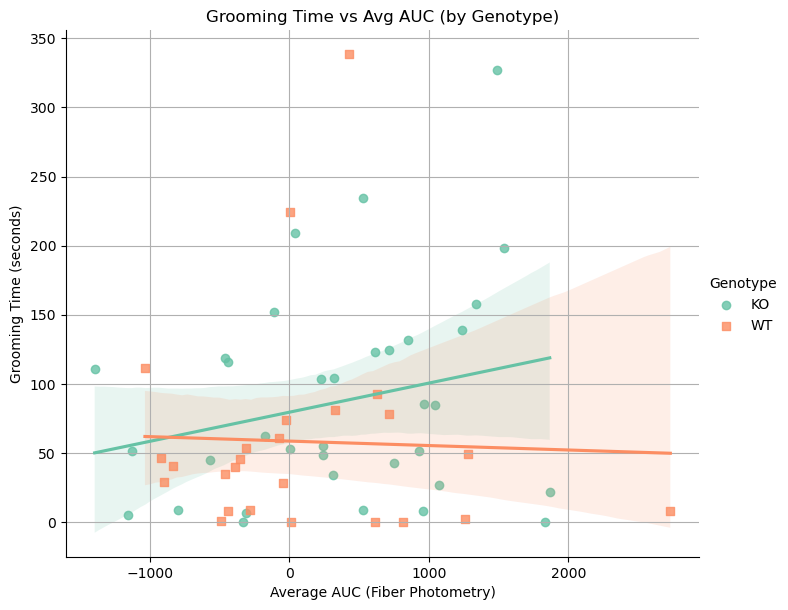

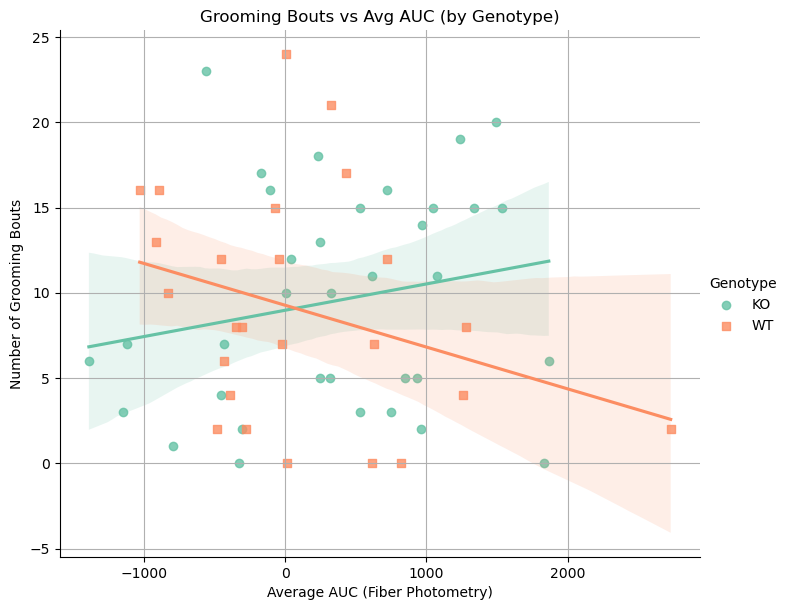

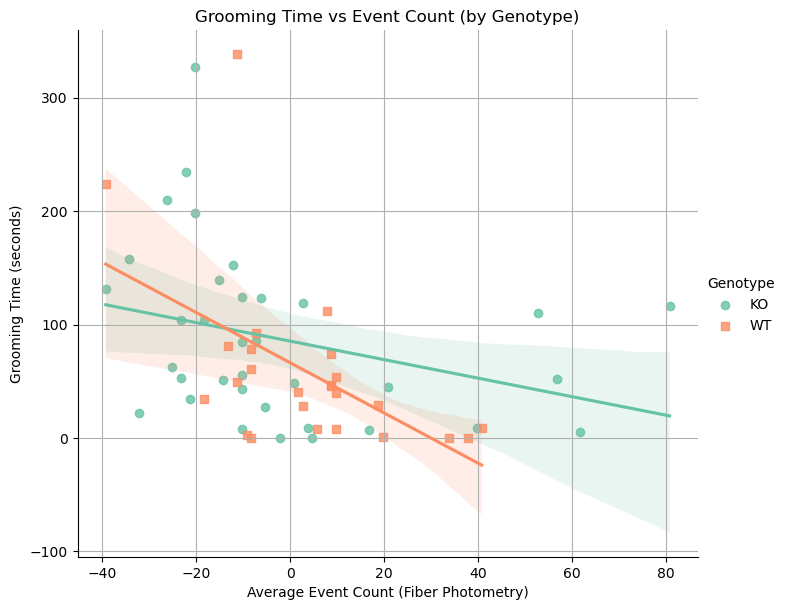

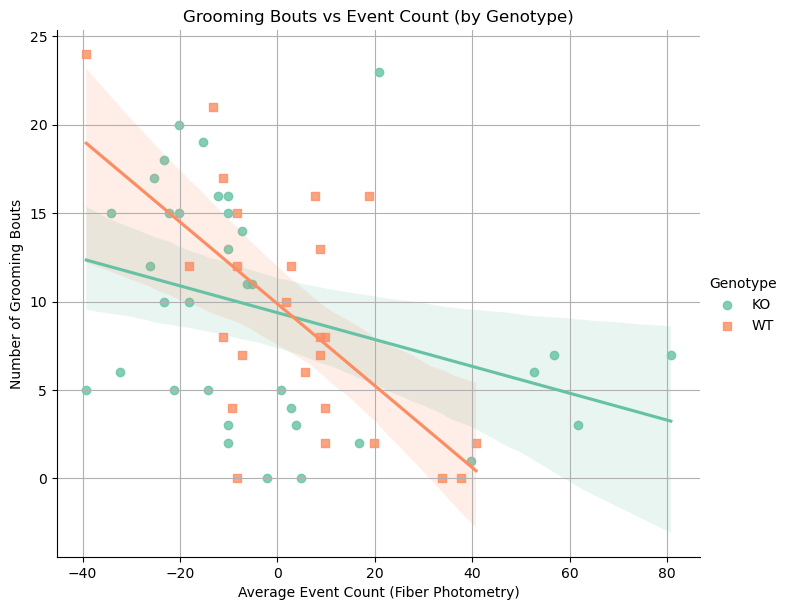

In [5]:

# ─── 1. Avg_AUC vs Grooming_Time ─────────────────────────
sns.lmplot(
    data=df,
    x="Avg_AUC_centered",
    y="Grooming_Time",
    hue="Genotype",
    palette="Set2",
    ci=95,
    markers=["o", "s"],
    height=6,
    aspect=1.2
)
plt.title("Grooming Time vs Avg AUC (by Genotype)")
plt.xlabel("Average AUC (Fiber Photometry)")
plt.ylabel("Grooming Time (seconds)")
plt.grid(True)

# ─── 2. Avg_AUC vs Grooming_Bouts ────────────────────────
sns.lmplot(
    data=df,
    x="Avg_AUC_centered",
    y="Grooming_Bouts",
    hue="Genotype",
    palette="Set2",
    ci=95,
    markers=["o", "s"],
    height=6,
    aspect=1.2
)
plt.title("Grooming Bouts vs Avg AUC (by Genotype)")
plt.xlabel("Average AUC (Fiber Photometry)")
plt.ylabel("Number of Grooming Bouts")
plt.grid(True)

# ─── 3. Avg_Event_Count vs Grooming_Time ─────────────────
sns.lmplot(
    data=df,
    x="Avg_Event_Count_centered",
    y="Grooming_Time",
    hue="Genotype",
    palette="Set2",
    ci=95,
    markers=["o", "s"],
    height=6,
    aspect=1.2
)
plt.title("Grooming Time vs Event Count (by Genotype)")
plt.xlabel("Average Event Count (Fiber Photometry)")
plt.ylabel("Grooming Time (seconds)")
plt.grid(True)

# ─── 4. Avg_Event_Count vs Grooming_Bouts ────────────────
sns.lmplot(
    data=df,
    x="Avg_Event_Count_centered",
    y="Grooming_Bouts",
    hue="Genotype",
    palette="Set2",
    ci=95,
    markers=["o", "s"],
    height=6,
    aspect=1.2
)
plt.title("Grooming Bouts vs Event Count (by Genotype)")
plt.xlabel("Average Event Count (Fiber Photometry)")
plt.ylabel("Number of Grooming Bouts")
plt.grid(True)


c:\Users\urimons.WISMAIN\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\urimons.WISMAIN\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\urimons.WISMAIN\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\urimons.WISMAIN\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Grooming Bouts vs Avg AUC by EPA Phase and Genotype')

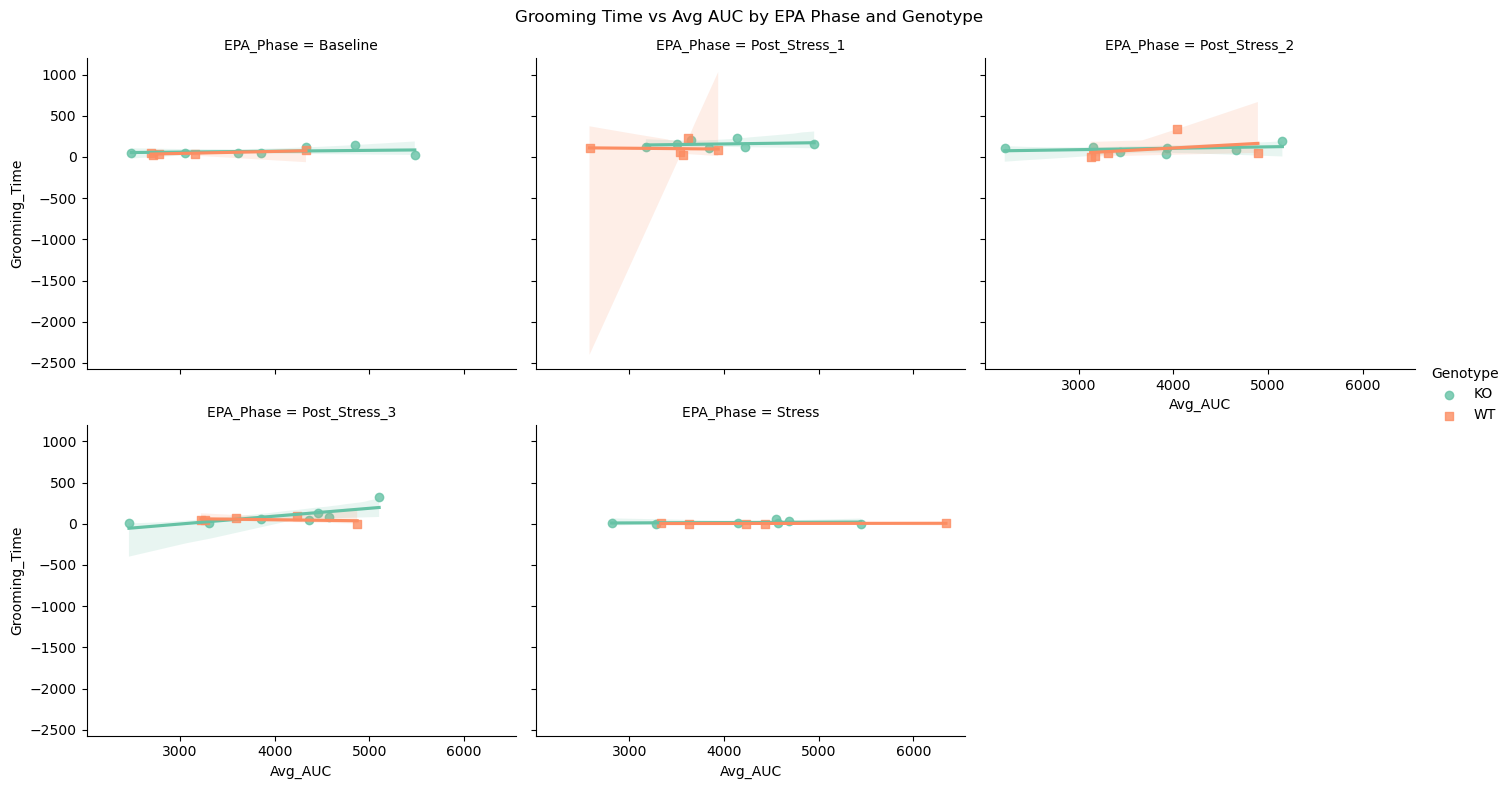

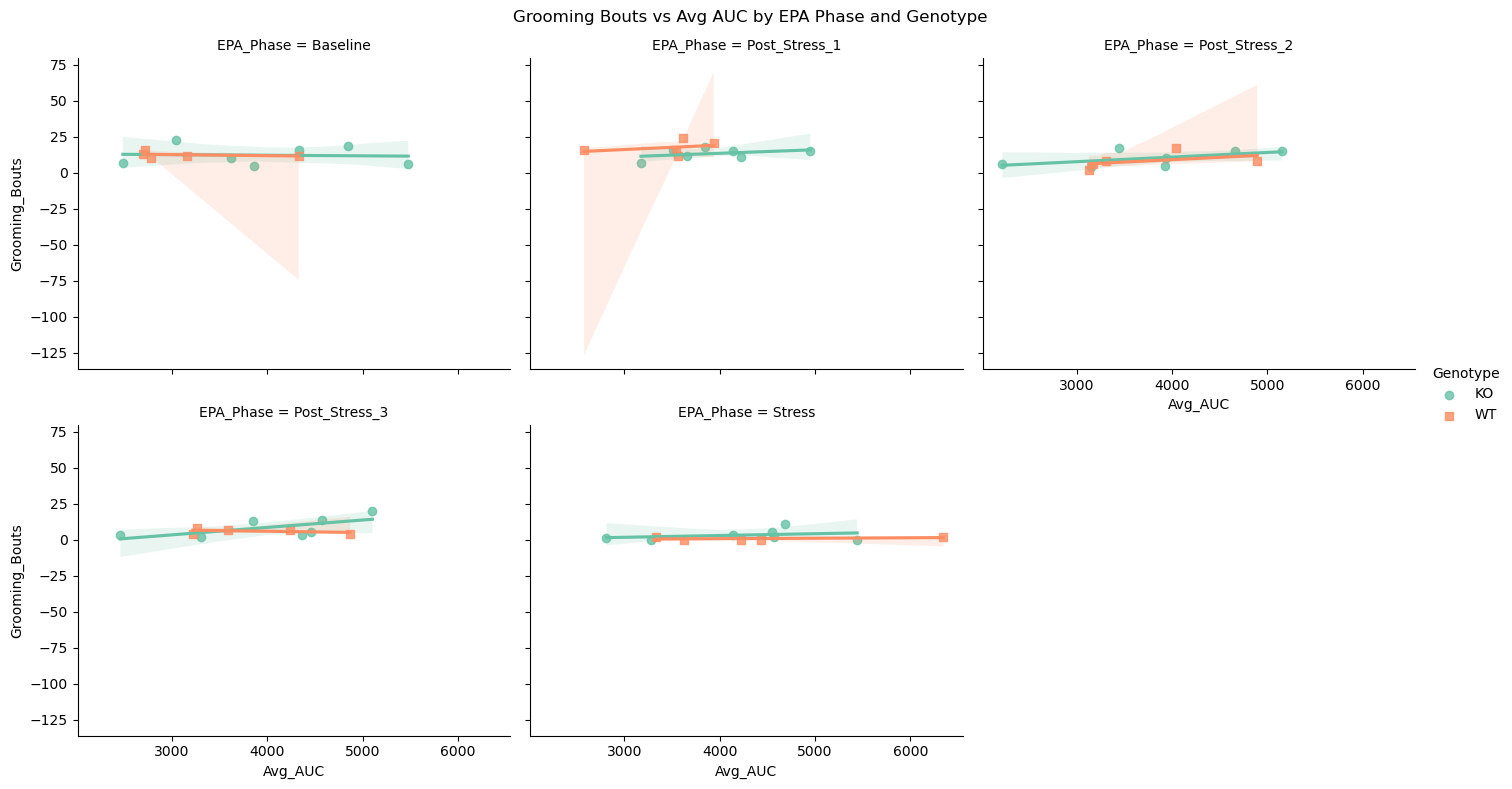

In [6]:
# Create FacetGrid of scatter + trendlines by EPA phase
g = sns.lmplot(
    data=df,
    x="Avg_AUC",
    y="Grooming_Time",
    hue="Genotype",
    col="EPA_Phase",
    col_wrap=3,
    palette="Set2",
    markers=["o", "s"],
    height=4,
    aspect=1.2,
    ci=95
)

g.fig.subplots_adjust(top=0.92)
g.fig.suptitle("Grooming Time vs Avg AUC by EPA Phase and Genotype")

# Create FacetGrid of scatter + trendlines by EPA phase
g = sns.lmplot(
    data=df,
    x="Avg_AUC",
    y="Grooming_Bouts",
    hue="Genotype",
    col="EPA_Phase",
    col_wrap=3,
    palette="Set2",
    markers=["o", "s"],
    height=4,
    aspect=1.2,
    ci=95
)

g.fig.subplots_adjust(top=0.92)
g.fig.suptitle("Grooming Bouts vs Avg AUC by EPA Phase and Genotype")


In [7]:
# Add a squared term to the DataFrame
df["Avg_AUC_sq"] = df["Avg_AUC"] ** 2

# Fit mixed model: Grooming_Time ~ AUC + AUC^2 + Genotype + Phase
model_quad = smf.mixedlm(
    "Grooming_Time ~ Avg_AUC + Avg_AUC_sq + Genotype + C(EPA_Phase)",
    df,
    groups=df["Mouse_ID"]
)

result_quad = model_quad.fit()
print(result_quad.summary())


                    Mixed Linear Model Regression Results
Model:                  MixedLM       Dependent Variable:       Grooming_Time
No. Observations:       60            Method:                   REML         
No. Groups:             12            Scale:                    2980.3638    
Min. group size:        5             Log-Likelihood:           -319.2394    
Max. group size:        5             Converged:                Yes          
Mean group size:        5.0                                                  
-----------------------------------------------------------------------------
                               Coef.   Std.Err.   z    P>|z|  [0.025   0.975]
-----------------------------------------------------------------------------
Intercept                       30.468  168.687  0.181 0.857 -300.153 361.088
Genotype[T.WT]                 -25.839   26.257 -0.984 0.325  -77.302  25.624
C(EPA_Phase)[T.Post_Stress_1]   73.015   23.236  3.142 0.002   27.474 118.557
C(EPA_

In [8]:
# Mixed model with AUC × Phase interaction
model = smf.mixedlm(
    "Grooming_Time ~ Avg_AUC * C(EPA_Phase) + Genotype",
    df,
    groups=df["Mouse_ID"]
)

result = model.fit()
print(result.summary())

                        Mixed Linear Model Regression Results
Model:                      MixedLM         Dependent Variable:         Grooming_Time
No. Observations:           60              Method:                     REML         
No. Groups:                 12              Scale:                      2871.2122    
Min. group size:            5               Log-Likelihood:             -317.0467    
Max. group size:            5               Converged:                  Yes          
Mean group size:            5.0                                                      
-------------------------------------------------------------------------------------
                                       Coef.   Std.Err.   z    P>|z|  [0.025   0.975]
-------------------------------------------------------------------------------------
Intercept                               84.438   76.048  1.110 0.267  -64.614 233.490
C(EPA_Phase)[T.Post_Stress_1]           53.420  127.062  0.420 0.674 -195.616 